## Question 1

In [1]:
import pandas as pd
from wwo_hist import retrieve_hist_data
from threading import Thread

import os
from os.path import exists

import matplotlib.pyplot as plt
%matplotlib inline

import time

def func_time_compare(get_data = False):

    df = pd.DataFrame()
    
    st = time.perf_counter()
    sequence_api(get_data = get_data) 
    et_f1 = time.perf_counter() - st
    
    st = time.perf_counter()
    thread_api(get_data = get_data) 
    et_f2 = time.perf_counter() - st
    
    return {"Sequence Time": et_f1,
            "Threading Time": et_f2}


def sequence_api(get_data = False):    

    location_list = ["Alabama", "Alaska", "Arkansas", "Arizona", "California",
                     "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
                     "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", 
                     "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", 
                     "Minnesota", "Missouri", "Mississippi", "Montana", 
                     "North_Carolina", "North_Dakota", "Nebraska", "New_Hampshire", 
                     "New_Jersey", "New_Mexico", "Nevada", "New_York", "Ohio", 
                     "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", 
                     "South_Carolina", "South_Dakota", "Tennessee", "Texas", 
                     "Utah", "Virginia", "Vermont", "Washington", 
                     "Wisconsin", "West_Virginia", "Wyoming"]
    
    if get_data:
        
        frequency = 1
        start_date = '01-SEP-2022'
        end_date = '01-OCT-2022'
        api_key = '20d8713bb9ec4d0280b42849220810'

        retrieve_hist_data(api_key,
                            location_list,
                            start_date,
                            end_date,
                            frequency,
                            location_label = False,
                            export_csv = True)

    df = pd.DataFrame()

    for state in location_list:
        df_temp = pd.read_csv(r"" + state + ".csv")
        df = pd.concat([df, df_temp])
        
    df_grouped_stats = df.groupby(['location']).agg({'mintempC':'min', 
                                                 'maxtempC':'max', 
                                                 'tempC': 'mean'}).reset_index()
    
    return df_grouped_stats


def thread_api(get_data = False):
    
    location_list = ["Alabama", "Alaska", "Arkansas", "Arizona", "California",
             "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", 
             "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", 
             "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", 
             "Minnesota", "Missouri", "Mississippi", "Montana", 
             "North_Carolina", "North_Dakota", "Nebraska", "New_Hampshire", 
             "New_Jersey", "New_Mexico", "Nevada", "New_York", "Ohio", 
             "Oklahoma", "Oregon", "Pennsylvania", "Rhode_Island", 
             "South_Carolina", "South_Dakota", "Tennessee", "Texas", 
             "Utah", "Virginia", "Vermont", "Washington", 
             "Wisconsin", "West_Virginia", "Wyoming"]

    mid = len(location_list) // 2
    location_01to25 = location_list[:mid]
    location_26to50 = location_list[mid:]

    frequency = 1
    start_date = '01-SEP-2022'
    end_date = '01-OCT-2022'
    api_key = '20d8713bb9ec4d0280b42849220810'
    location_label = False
    export_csv = True
    
    if get_data:
        fetch_1 = Thread(target = retrieve_hist_data, args = (api_key, location_01to25, start_date, 
                                                         end_date, end_date, location_label, 
                                                         export_csv))
        fetch_2 = Thread(target = retrieve_hist_data, args = (api_key, location_26to50, start_date, 
                                                             end_date, end_date, location_label, 
                                                             export_csv))

        fetch_1.start()
        fetch_2.start()
        
        
        fetch_1.join()
        fetch_2.join()
        
        
    df = pd.DataFrame()

    for state in location_list:
        df_temp = pd.read_csv(r"" + state + ".csv")
        df = pd.concat([df, df_temp])

    df_grouped_stats = df.groupby(['location']).agg({'mintempC':'min', 
                                                 'maxtempC':'max', 
                                                 'tempC': 'mean'}).reset_index()
    
    return df_grouped_stats   

In [2]:
%%capture
time_data = func_time_compare(get_data = True)

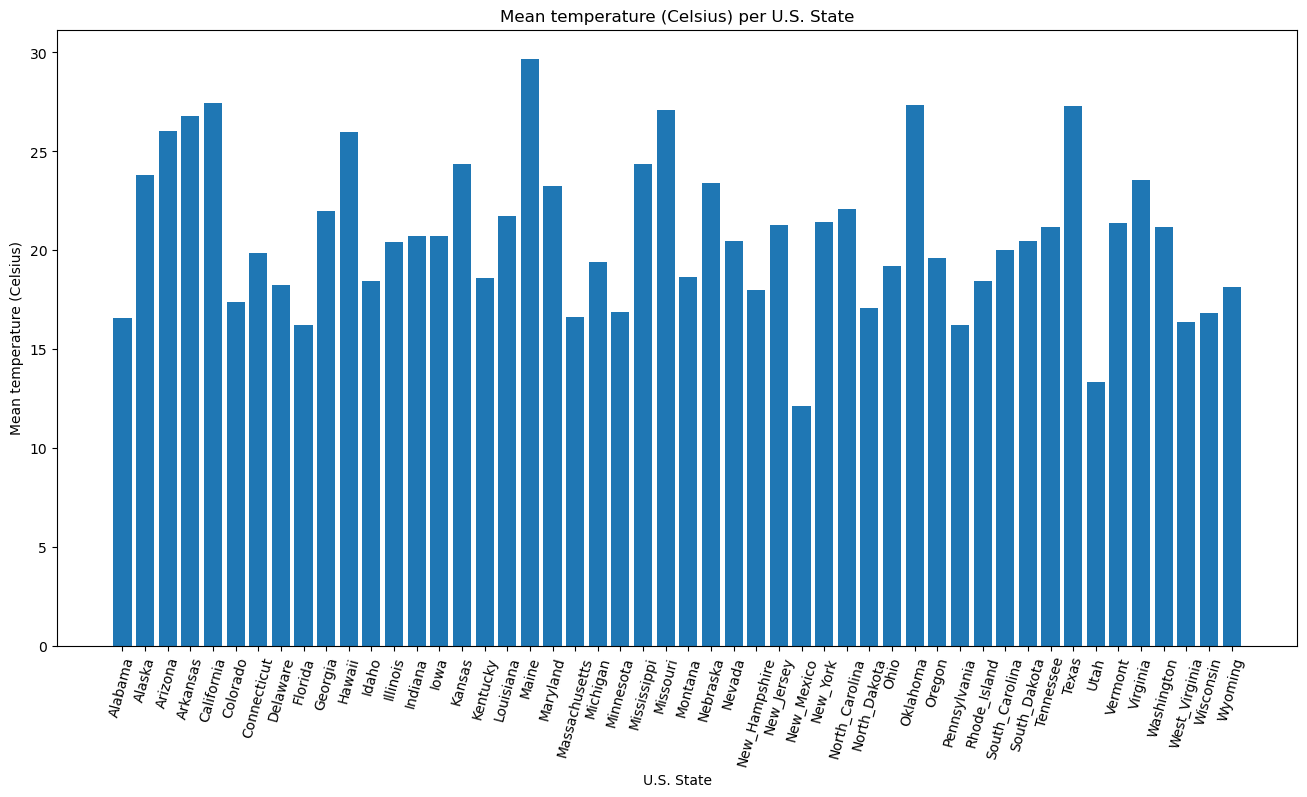

In [3]:
df_grouped_stats = thread_api(get_data = False)
plt.figure(figsize=(16, 8))
plt.bar(x = df_grouped_stats["location"], height = df_grouped_stats["tempC"])
plt.xticks(rotation = 75)
plt.xlabel("U.S. State")
plt.ylabel("Mean temperature (Celsius)")
plt.title("Mean temperature (Celsius) per U.S. State")

plt.show()

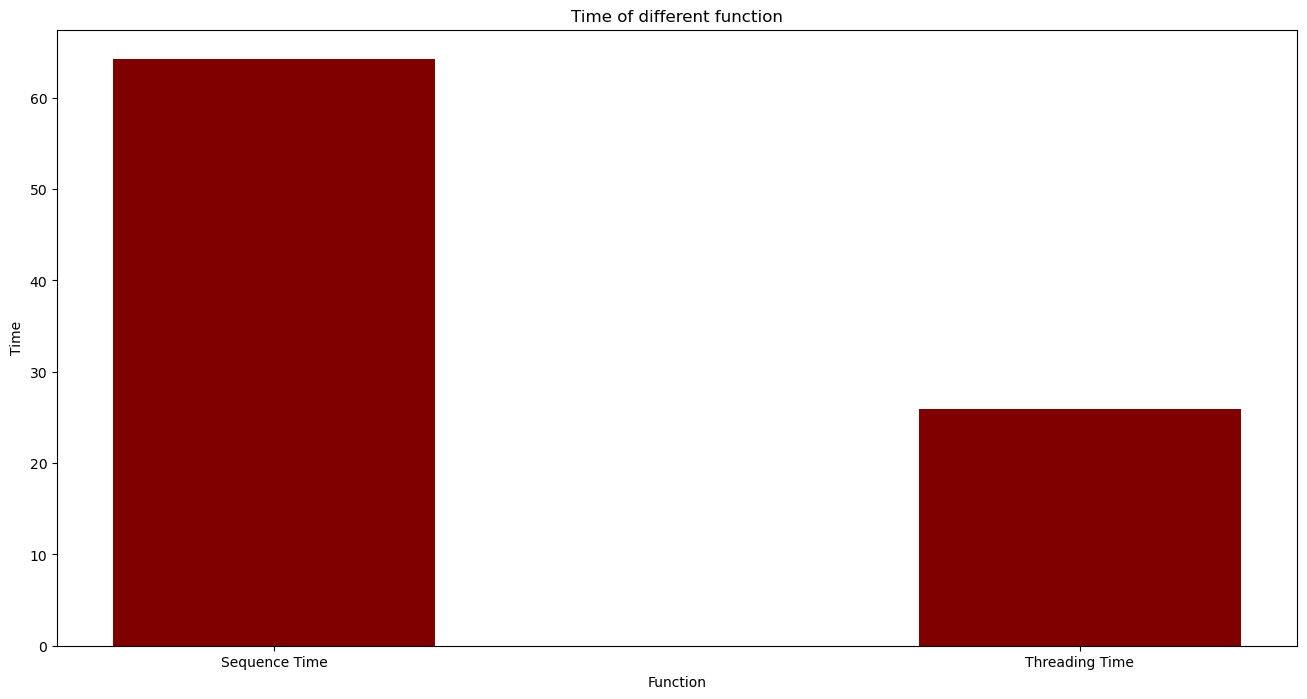

In [4]:
fig = plt.figure(figsize = (16, 8))
 
plt.bar(time_data.keys(), time_data.values(), color ='maroon',width = 0.4)
 
plt.xlabel("Function")
plt.ylabel("Time")
plt.title("Time of different function")
plt.show()

## Question 2

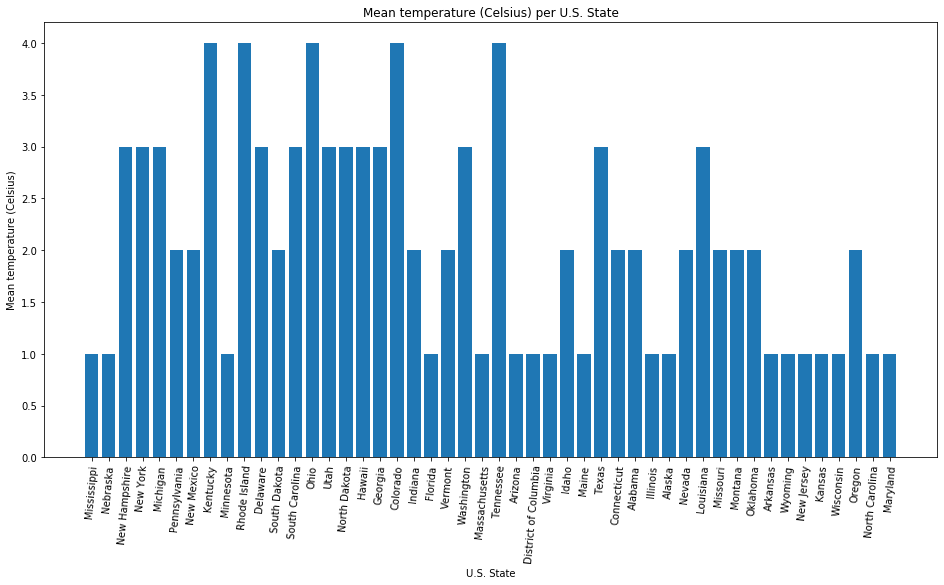

In [93]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline

url = "https://www.summet.com/dmsi/html/codesamples/addresses.html"
data = requests.get(url)

state = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

soup = BeautifulSoup(data.content) 

scrapped_data = []
for row in soup.find_all("li"):
    scrapped_data.append(row.get_text(strip = True, 
                                     separator = '\n').splitlines())
    
first_names = []
last_names = []
phone_numbers = []
city = []
state_data = []
zip_code = []
    
    
for row, v in enumerate(scrapped_data):
    first_names.append(scrapped_data[row][0].split()[0])
    last_names.append(scrapped_data[row][0].split()[1])
    phone_numbers.append(scrapped_data[row][3])
    
    # Get zip code
    city_state_zip = scrapped_data[row][2]
    z = city_state_zip.split()[-1]
    zip_code.append(z)
    city_state_zip = city_state_zip.replace(z, "").strip()
    
    loc_list = city_state_zip.split()
    
    if len(loc_list[-1]) == 2:
        state_data.append(state[loc_list[-1]])
        del loc_list[-1]
        
    elif loc_list[-1] in state.values():
        state_data.append(loc_list[-1])
        del loc_list[-1]

    else:
        state_data.append(" ".join(loc_list[-2:]))
        del loc_list[-2:]
        
    city.append(loc_list)
    
    
scrapped_data_dict = {"Last Name": last_names, "First Name": first_names,
                 "City": city, "State": state_data, 
                 "Zip Code": zip_code, "Phone": phone_numbers}

class data(object):
    
    def __init__(self, last, first, phone, city, state, zip_c):
        self.last = last
        self.first = first
        self.last = phone
        self.first = city
        self.last = state
        self.first = zip_c
    
for i in enumerate(first_names):
    
    
# people = range(100)
        
# for i, v in enumerate(people):
#     v = informaion(last_names[i], first_names[i])


# Graph
# state_count = {}

# for i in state_data:
#     if i in state_count:
#         state_count[i] += 1
#     else:
#         state_count[i] = 1
        
# plt.figure(figsize=(16, 8))
# plt.bar(x = state_count.keys(), height = state_count.values())
# plt.xticks(rotation = 85)
# plt.xlabel("U.S. State")
# plt.ylabel("Mean temperature (Celsius)")
# plt.title("Mean temperature (Celsius) per U.S. State")

# plt.show()